In [9]:
from oct_library import OCTProcessing
import torch
from utils import get_filenames
import os
import numpy as np
import yaml
import matplotlib.pyplot as plt

base_path = '../../logs/2022-11-03_19_52_46'
model_path = os.path.join(base_path, 'checkpoints/model.pth')
model = torch.load(model_path, map_location='cuda')
oct_path = '../../dataset/hopkins/vol/'
# oct_path = '/home/alonso/Documents/oct_segmentation/dataset/1_bonn_dataset_test/VolumeFilesControls/'
with open(os.path.join(base_path, 'experiment_cfg.yaml'), "r") as ymlfile:
    cfg = yaml.load(ymlfile, Loader=yaml.FullLoader)
oct_files = get_filenames(oct_path, 'vol')
pick = np.random.randint(0,len(oct_files))
print(pick, oct_files[pick])
oct_process = OCTProcessing(oct_file=oct_files[pick], torchmodel=model) # 125, 36, 10, 68, 15

B-scans are not equally spaced. Projections into the enface space are distorted.


4 ../../dataset/hopkins/vol/hc05_spectralis_macula_v1_s1_R.vol
No. of Scans:  49
Y-Fovea:  767.0
ScaleY:  0.0038716697599738836
ScaleX:  0.005846897605806589
Visit Date:  2010-10-19T11:17:16
Laterality:  OD


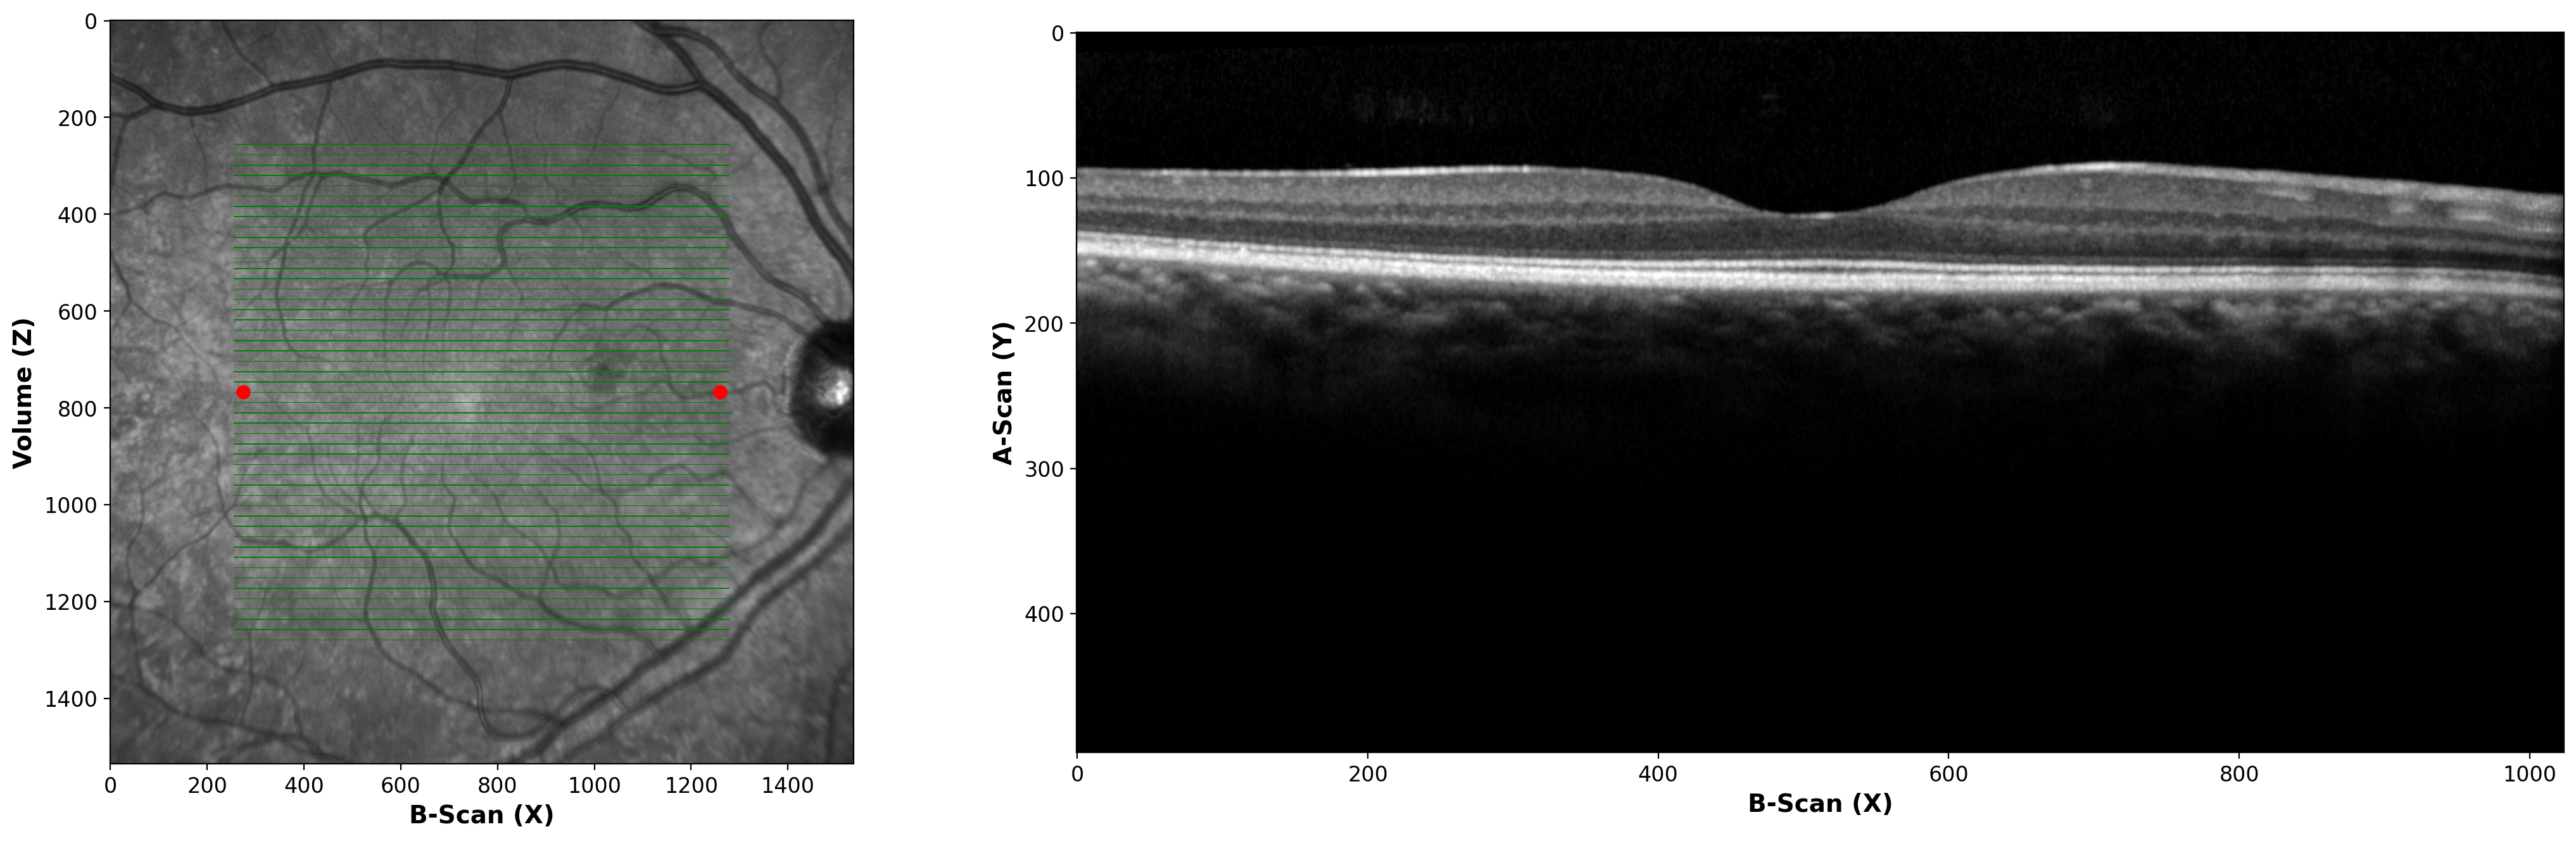

In [10]:
oct_process.plot_slo_fovea()

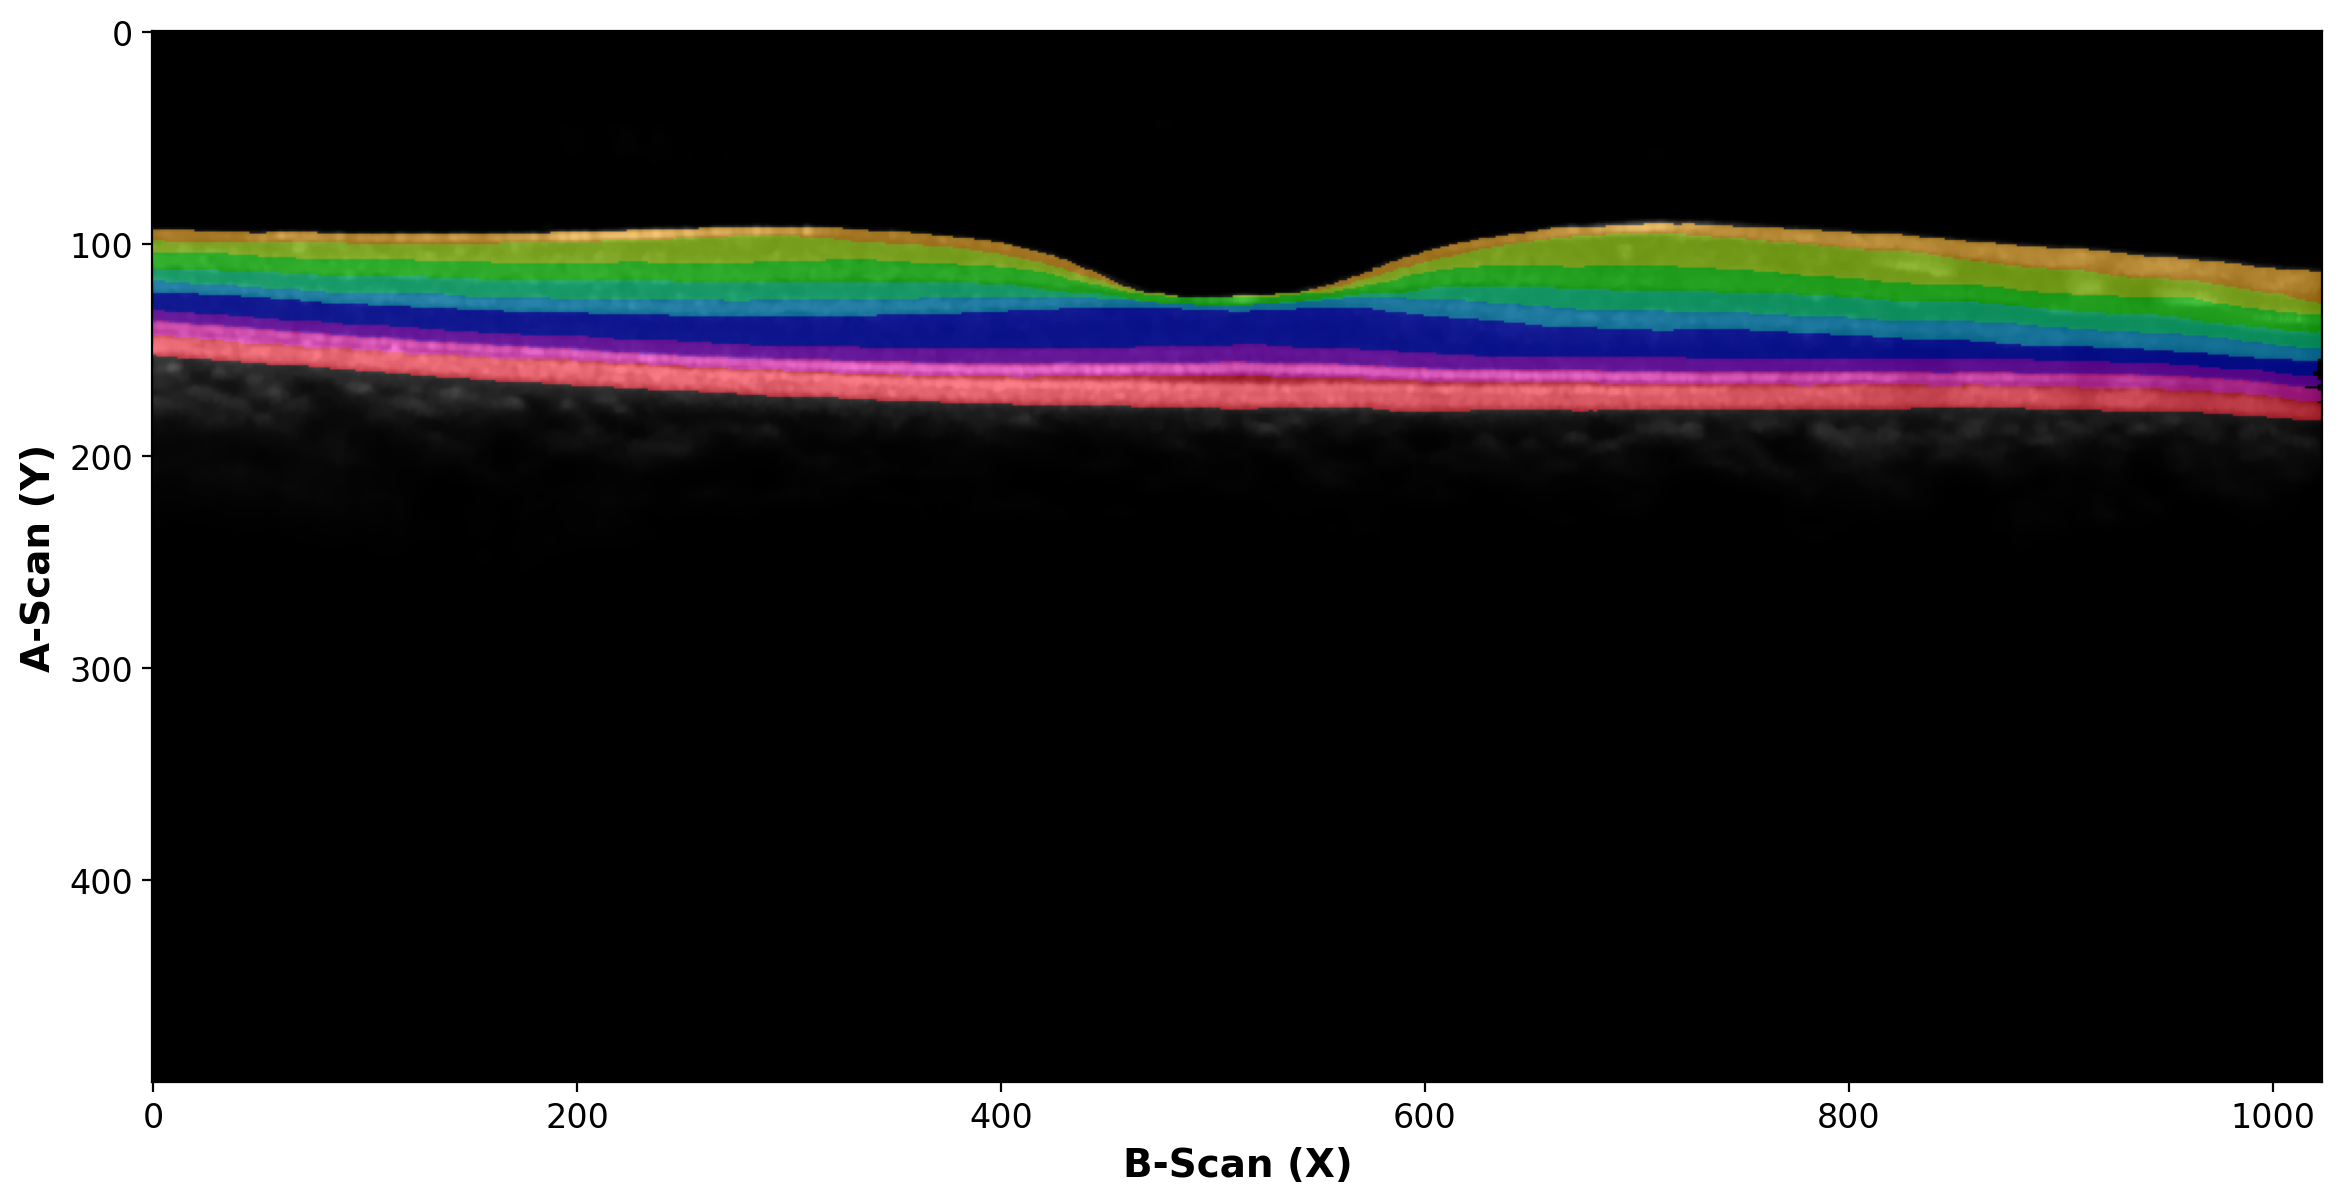

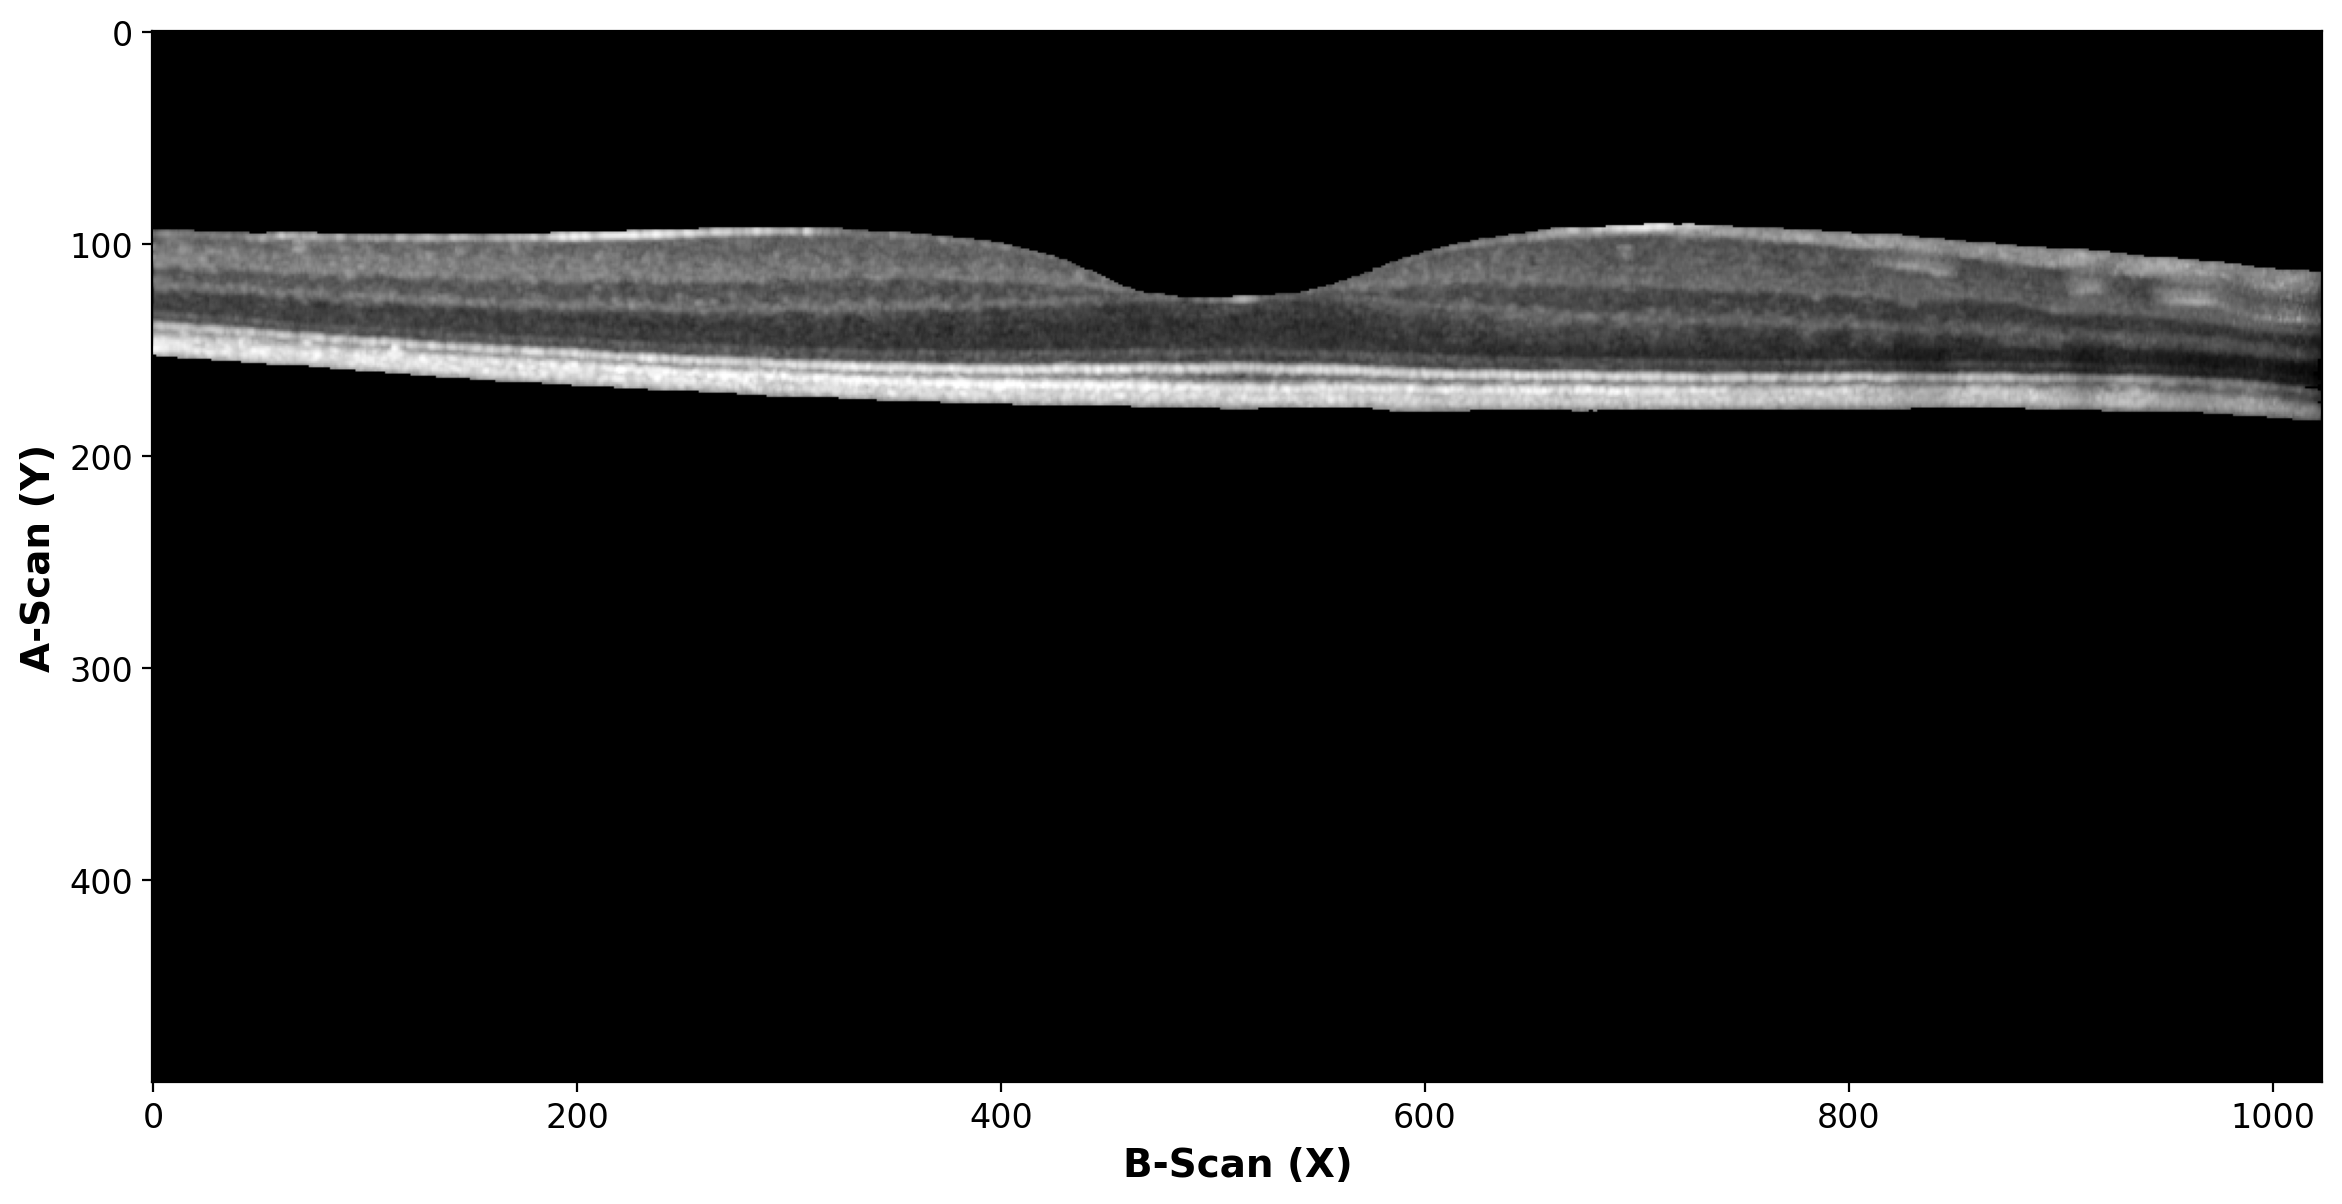

In [11]:
oct_process.fovea_forward(gamma=1.5, alpha=0.02, imgh=cfg['general']['img_sizeh'], imgw=cfg['general']['img_sizew'])
oct_process.plot_overlay_oct_segmentation()
oct_process.plot_segmentation_full()

49


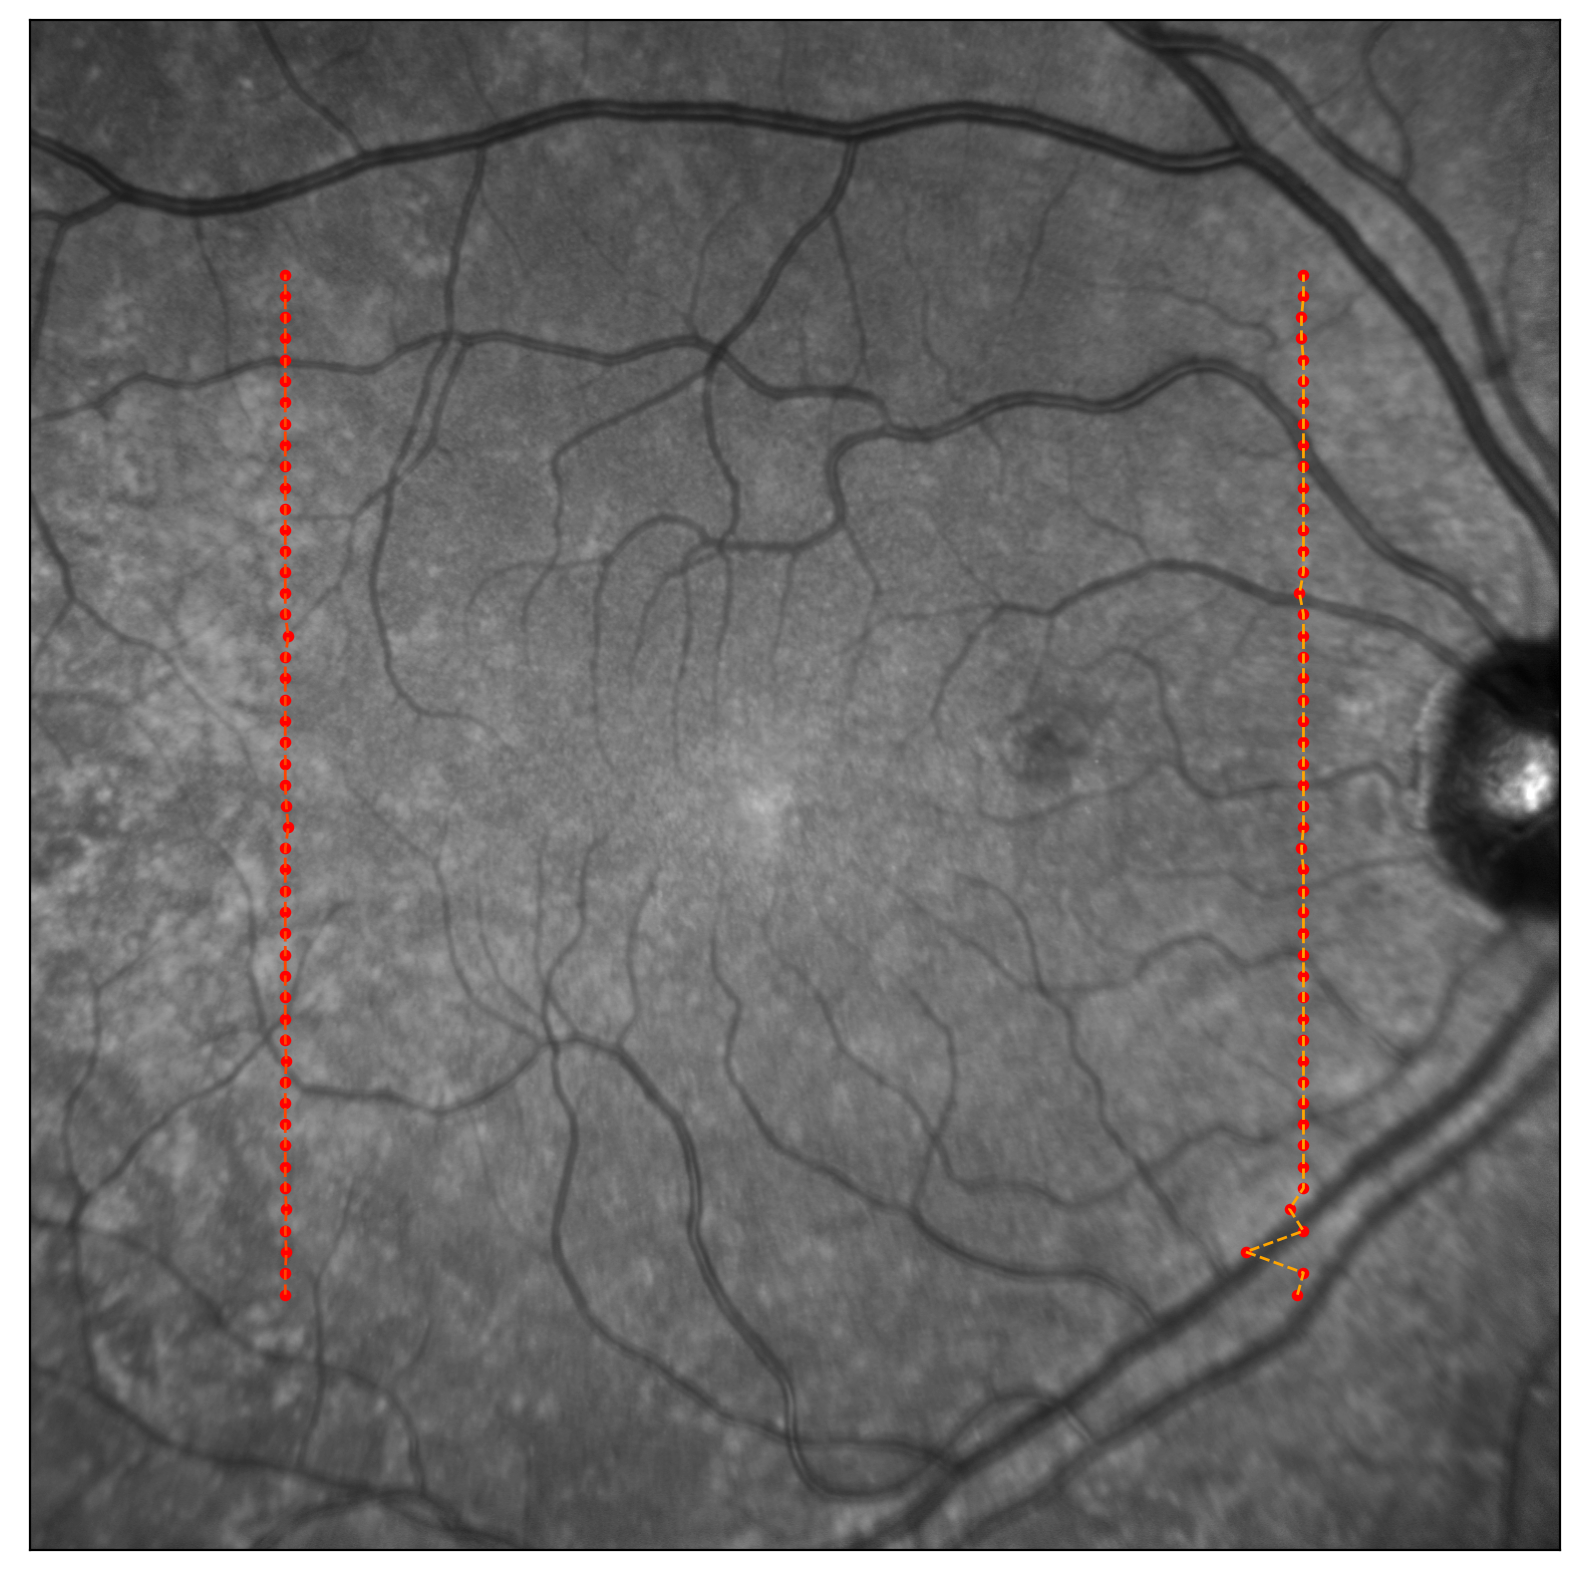

In [12]:
print(len(oct_process))
imgh = cfg['general']['img_sizeh']
imgw = cfg['general']['img_sizew']
Y_POS, delta_ez_lim = oct_process.volume_forward(tv_smooth=False, plot=True, imgh=imgh, imgw=imgw, bscan_positions=False)